In [1]:
'''Biblioteca usada no processo no repositorio: https://github.com/Birunda3000/Image-Augmentation'''

'Biblioteca usada no processo no repositorio: https://github.com/Birunda3000/Image-Augmentation'

In [2]:
import utils_loc as ut
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import pandas as pd
import sys
import cv2
from tqdm import tqdm
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../../../Image-Augmentation/')

import Aug
import utils

import pathlib

In [3]:
DATADIR1 = '../../../_DATA_/_DATA/AUG/shift/Original'
DATADIR1 = pathlib.Path(DATADIR1)

DATADIR2 = '../../../_DATA_/_DATA/AUG/shift/GOLD'
DATADIR2 = pathlib.Path(DATADIR2)

OUTDIR = '../../../_DATA_/_DATA/AUG/zoom'
OUTDIR = pathlib.Path(OUTDIR)

In [4]:
original, original_file_names = ut.read_imgs(path=DATADIR1, resize = False, mode = 'RGB', squared = True, square_color=(255,255,255), show = False, write=False, write_path='original')

gold_masks, gold_file_names = ut.read_imgs(path=DATADIR2, resize = False, mode = 'GRAYSCALE', squared = True, square_color=(0,0,0), show = False, write=False, write_path='gold_masks')

100%|██████████| 225/225 [00:24<00:00,  9.02it/s]


shear
distortion
skew

color -> original  
contrast -> original  
brilho -> original 
flip -> original e mask  
rotação -> Original e mask  | flip -> original e mask
shift -> original e mask  
center_zoom -> original e mask  

In [5]:
#flip_pipe = Aug.Pipe()
#flip_pipe.add(Aug.Flip(prob=1.0, top_bottom_left_right='TOP_BOTTOM'))  #"LEFT_RIGHT"
#flip_pipe.print_pipe()

#flip_pipe2 = Aug.Pipe()
#flip_pipe2.add(Aug.Flip(prob=1.0, top_bottom_left_right='LEFT_RIGHT'))  #"LEFT_RIGHT"
#flip_pipe2.print_pipe()

zoom_pipe = Aug.Pipe()
zoom_pipe.add(Aug.Zoom(prob=1.0, min_factor=4, max_factor=4))  #"LEFT_RIGHT"
zoom_pipe.print_pipe()

'''shift_pipe1 = Aug.Pipe()
shift_pipe1.add(Aug.Shift(prob=1.0, horizontal_max=0.35, vertical_max=0.35, randomise=False, fill="nearest"))
shift_pipe1.print_pipe()

shift_pipe2 = Aug.Pipe()
shift_pipe2.add(Aug.Shift(prob=1.0, horizontal_max=-0.35, vertical_max=0.35, randomise=False, fill="nearest"))
shift_pipe2.print_pipe()

shift_pipe3 = Aug.Pipe()
shift_pipe3.add(Aug.Shift(prob=1.0, horizontal_max=0.35, vertical_max=-0.35, randomise=False, fill="nearest"))
shift_pipe3.print_pipe()

shift_pipe4 = Aug.Pipe()
shift_pipe4.add(Aug.Shift(prob=1.0, horizontal_max=-0.35, vertical_max=-0.35, randomise=False, fill="nearest"))
shift_pipe4.print_pipe()'''

Operações:
|    Operação    | prob | min_factor | max_factor |
|      Zoom      | 1.0  |     4      |     4      |




'shift_pipe1 = Aug.Pipe()\nshift_pipe1.add(Aug.Shift(prob=1.0, horizontal_max=0.35, vertical_max=0.35, randomise=False, fill="nearest"))\nshift_pipe1.print_pipe()\n\nshift_pipe2 = Aug.Pipe()\nshift_pipe2.add(Aug.Shift(prob=1.0, horizontal_max=-0.35, vertical_max=0.35, randomise=False, fill="nearest"))\nshift_pipe2.print_pipe()\n\nshift_pipe3 = Aug.Pipe()\nshift_pipe3.add(Aug.Shift(prob=1.0, horizontal_max=0.35, vertical_max=-0.35, randomise=False, fill="nearest"))\nshift_pipe3.print_pipe()\n\nshift_pipe4 = Aug.Pipe()\nshift_pipe4.add(Aug.Shift(prob=1.0, horizontal_max=-0.35, vertical_max=-0.35, randomise=False, fill="nearest"))\nshift_pipe4.print_pipe()'

In [6]:
original_list = []
gold_list = []
for i in range(len(original)):
    #original_list.append([original[i],-1,'AUG-' + original_file_names[i]])
    #gold_list.append([gold_masks[i],-2,'AUG-' + gold_file_names[i]])
    original_list.append([original[i],-1, original_file_names[i]])
    gold_list.append([gold_masks[i],-2, gold_file_names[i]])

In [7]:
#utils.print_list_img(original_list)

In [8]:
#utils.print_list_img(gold_list)

In [9]:
original_aug1 = utils.call_thread(data = original_list, pipe_instance = zoom_pipe, img_per_thread=10, retornar_img_originais=False, image_per_image = 1, salvar_imagens_gerada=False, caminho='../teste')

#utils.print_list_img(original_aug1)


gold_aug1 = utils.call_thread(data = gold_list, pipe_instance = zoom_pipe, img_per_thread=10, retornar_img_originais=False, image_per_image = 1, salvar_imagens_gerada=False, caminho='../teste')

#utils.print_list_img(gold_aug1)

In [ ]:
'''original_aug2 = utils.call_thread(data = original_list, pipe_instance = shift_pipe2, img_per_thread=10, retornar_img_originais=False, image_per_image = 1, salvar_imagens_gerada=False, caminho='../teste')

#utils.print_list_img(original_aug2)


gold_aug2 = utils.call_thread(data = gold_list, pipe_instance = shift_pipe2, img_per_thread=10, retornar_img_originais=False, image_per_image = 1, salvar_imagens_gerada=False, caminho='../teste')'''

#utils.print_list_img(gold_aug2)

Thread 1: Executada com sucesso
Thread 0: Executada com sucesso
Thread 4: Executada com sucesso
Thread 3: Executada com sucesso
Thread 2: Executada com sucesso
Thread 0: Executada com sucesso
Thread 1: Executada com sucesso
Thread 4: Executada com sucesso
Thread 2: Executada com sucesso
Thread 3: Executada com sucesso


In [ ]:
'''original_aug3 = utils.call_thread(data = original_list, pipe_instance = shift_pipe3, img_per_thread=10, retornar_img_originais=False, image_per_image = 1, salvar_imagens_gerada=False, caminho='../teste')

#utils.print_list_img(original_aug3)


gold_aug3 = utils.call_thread(data = gold_list, pipe_instance = shift_pipe3, img_per_thread=10, retornar_img_originais=False, image_per_image = 1, salvar_imagens_gerada=False, caminho='../teste')'''

#utils.print_list_img(gold_aug3)

Thread 0: Executada com sucesso
Thread 1: Executada com sucesso
Thread 4: Executada com sucesso
Thread 2: Executada com sucesso
Thread 3: Executada com sucesso
Thread 1: Executada com sucesso
Thread 0: Executada com sucesso
Thread 4: Executada com sucesso
Thread 2: Executada com sucesso
Thread 3: Executada com sucesso


In [ ]:
'''original_aug4 = utils.call_thread(data = original_list, pipe_instance = shift_pipe4, img_per_thread=10, retornar_img_originais=False, image_per_image = 1, salvar_imagens_gerada=False, caminho='../teste')

#utils.print_list_img(original_aug4)


gold_aug4 = utils.call_thread(data = gold_list, pipe_instance = shift_pipe4, img_per_thread=10, retornar_img_originais=False, image_per_image = 1, salvar_imagens_gerada=False, caminho='../teste')'''

#utils.print_list_img(gold_aug4)

Thread 0: Executada com sucesso
Thread 1: Executada com sucesso
Thread 4: Executada com sucesso
Thread 2: Executada com sucesso
Thread 3: Executada com sucesso
Thread 0: Executada com sucesso
Thread 1: Executada com sucesso
Thread 4: Executada com sucesso
Thread 2: Executada com sucesso
Thread 3: Executada com sucesso


Numero imagens - 225


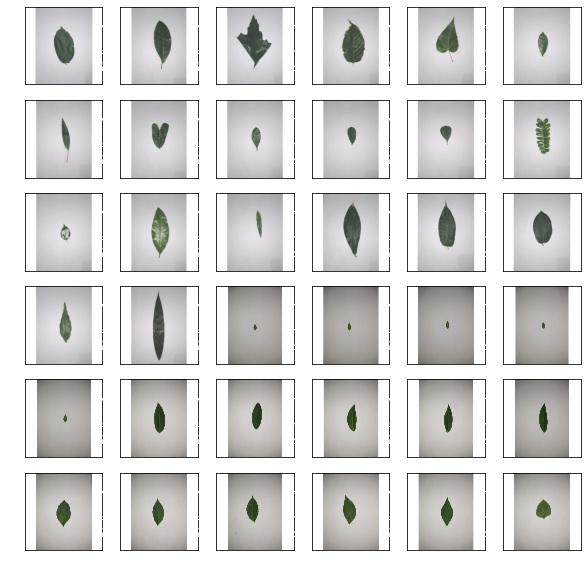

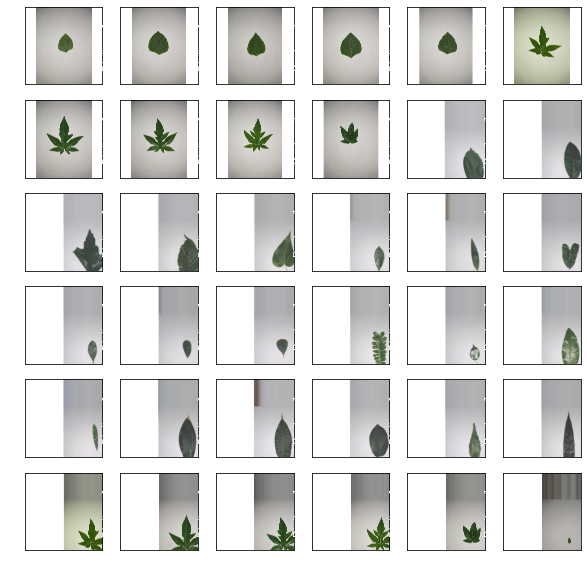

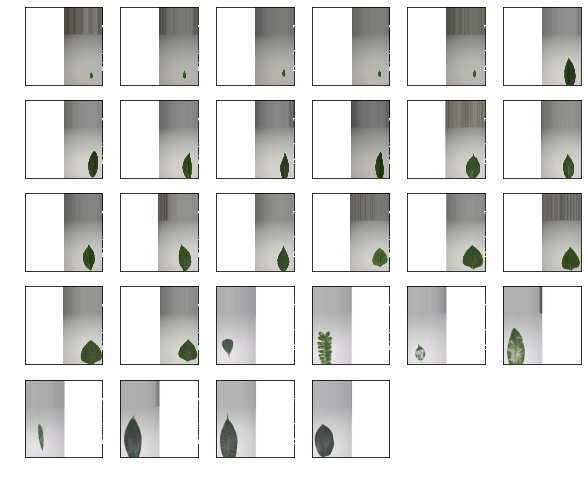

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Numero imagens - 225


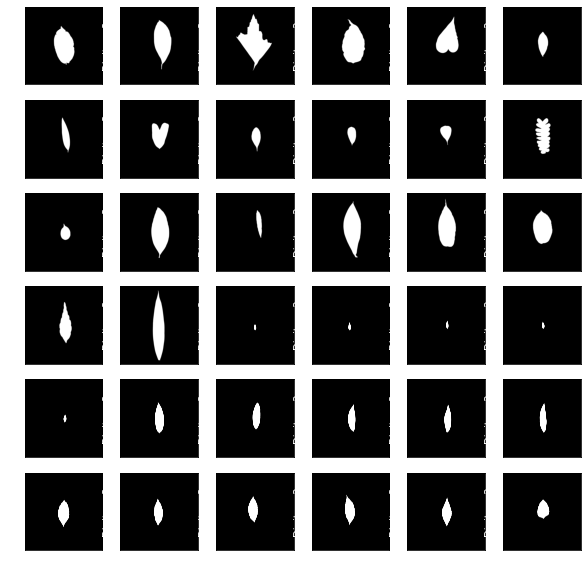

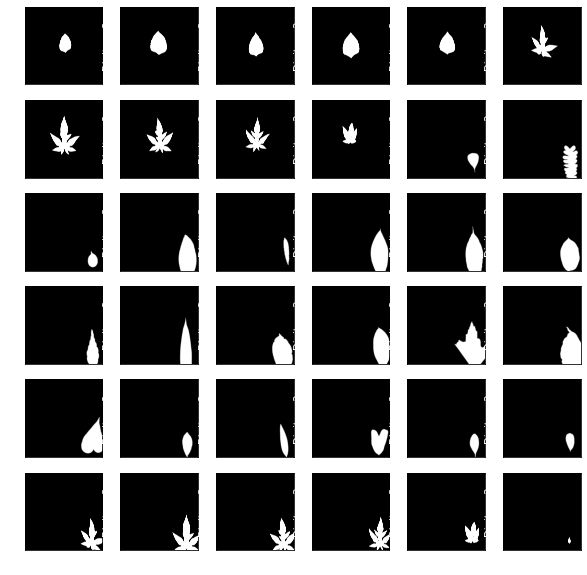

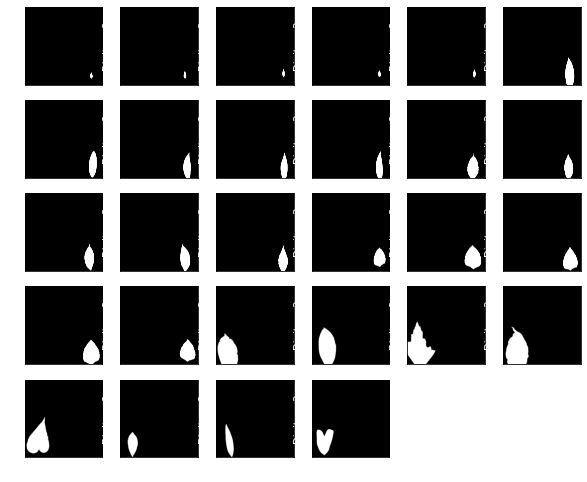

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [ ]:
original_list_aug = original_list + original_aug1 #+ original_aug2 + original_aug3 + original_aug4
gold_list_aug = gold_list + gold_aug1 #+ gold_aug2 + gold_aug3 + gold_aug4

utils.print_list_img(original_list_aug)
utils.print_list_img(gold_list_aug)

In [ ]:

for i in range(len(original_list_aug)):
    print(f'Original - {original_list_aug[i][2]}')
    print(f'Gold - {gold_list_aug[i][2]}')
    
    path = os.path.join(OUTDIR, 'ORIGINAL', str(i+1) + '_'+original_list_aug[i][2][2:])
    print(f'Original - {path}')
    cv2.imwrite(path,cv2.cvtColor(original_list_aug[i][0], cv2.COLOR_RGB2BGR))
    
    path = os.path.join(OUTDIR, 'GOLD', str(i+1) + '_'+gold_list_aug[i][2][2:])
    print(f'Original - {path}')
    cv2.imwrite(path, cv2.cvtColor(gold_list_aug[i][0], cv2.COLOR_RGB2BGR))

    print()

Original - AUG-01.jpg
Gold - AUG-01.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\ORIGINAL\1_AUG-01.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\GOLD\1_AUG-01.jpg

Original - AUG-02.jpg
Gold - AUG-02.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\ORIGINAL\2_AUG-02.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\GOLD\2_AUG-02.jpg

Original - AUG-03.jpg
Gold - AUG-03.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\ORIGINAL\3_AUG-03.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\GOLD\3_AUG-03.jpg

Original - AUG-04.jpg
Gold - AUG-04.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\ORIGINAL\4_AUG-04.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\GOLD\4_AUG-04.jpg

Original - AUG-05.jpg
Gold - AUG-05.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\ORIGINAL\5_AUG-05.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\GOLD\5_AUG-05.jpg

Original - AUG-06.jpg
Gold - AUG-06.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\ORIGINAL\6_AUG-06.jpg
Original - ..\..\..\_DATA_\_DATA\AUG\shift\GOLD\6_AUG-06.jpg